Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available
)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df.shape

(908, 25)

## i can see in 3 coloumns other_fuel3 , estimated_generation_gwh and wepp_id has no values
## other_fuel2 has only one non null value and 
## other_fuel1 has only 199 values which is very less so we can drop some of the columns

In [8]:
#droping unnecessery columns
df.drop(['estimated_generation_gwh','wepp_id','other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [9]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [11]:
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

# here i can see country and country long has only one value in whole data also year_of_capacity_data has one value which will not useful to pridict primary fuel and capacity in MW so i am dropping all this columns. also name is not useful so droping it too.

In [13]:
df.drop(['name','country','country_long','year_of_capacity_data'],axis =1,inplace=True)

In [14]:
df.shape

(908, 16)

In [15]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


url is also not useful for us so dropping it 

In [17]:
df.drop('url',axis =1,inplace=True)

In [18]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# filling geolocation_source with mode because categorical data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
geolocation_source          0
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [21]:
df['owner'].fillna(df['owner'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                       0
source                      0
geolocation_source          0
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [23]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,Acc Acc ltd,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#filling null values of numeric coumns

In [25]:
#before filling na in numeric columns i want to drop generation_data_source column which is not needed
df.drop('generation_data_source',axis =1,inplace=True)

In [26]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                    0
source                   0
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [27]:
# filling null values with median in numerical columns
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())

In [28]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())

In [29]:
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())

In [30]:
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())

In [31]:
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [32]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                    0
source                   0
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [33]:
df['latitude'] = df['latitude'].fillna(df['latitude'].median())

In [34]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

In [35]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())

In [36]:
df.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<Axes: xlabel='primary_fuel', ylabel='count'>

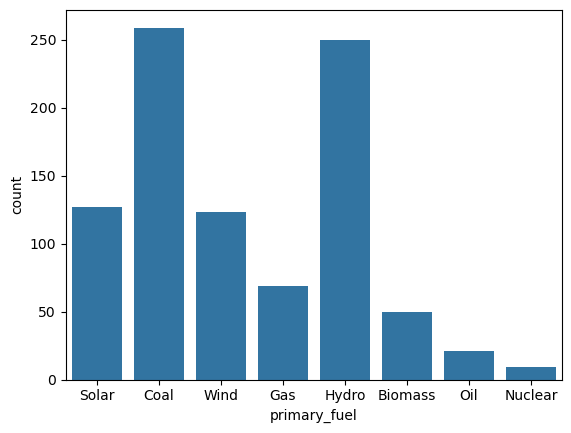

In [37]:
sns.countplot(x="primary_fuel", data=df)

## i can see hydro fuel and coal has more count tahn other 

In [81]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64


capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64


latitude
21.7783    46
19.0004     3
24.1917     3
31.2680     2
14.2352     2
           ..
22.7554     1
27.1598     1
17.2970     1
20.8772     1
9.9344      1
Name: count, Length: 838, dtype: int64


longitude
76.71925    46
71.69170     4
71.69180     3
72.89830     3
81.28750     3
            ..
72.76290     1
70.39610     1
74.23930     1
77.04350     1
77.47680     1
Name: count, Length: 829, dtype: int64


primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int6

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   longitude            908 non-null    float64
 4   primary_fuel         908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   owner                908 non-null    object 
 7   source               908 non-null    object 
 8   geolocation_source   908 non-null    object 
 9   generation_gwh_2013  908 non-null    float64
 10  generation_gwh_2014  908 non-null    float64
 11  generation_gwh_2015  908 non-null    float64
 12  generation_gwh_2016  908 non-null    float64
 13  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.4+ KB


<Axes: >

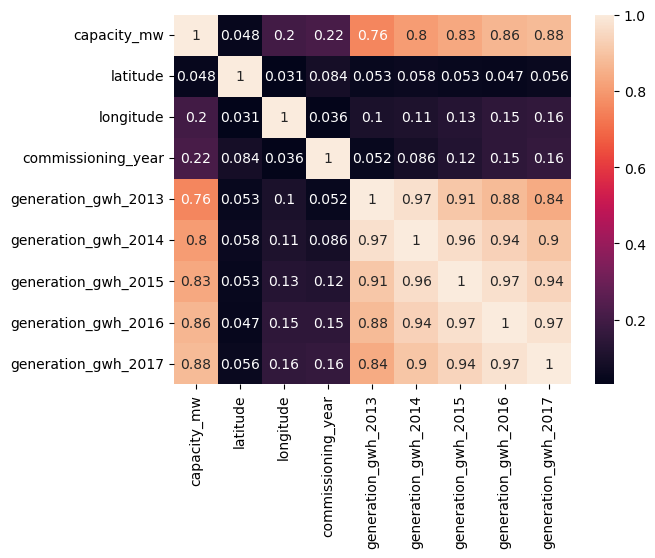

In [61]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## generation_gwh_2013	generation_gwh_2014	generation_gwh_2015	generation_gwh_2016	generation_gwh_2017 are having positive correlation with capacity

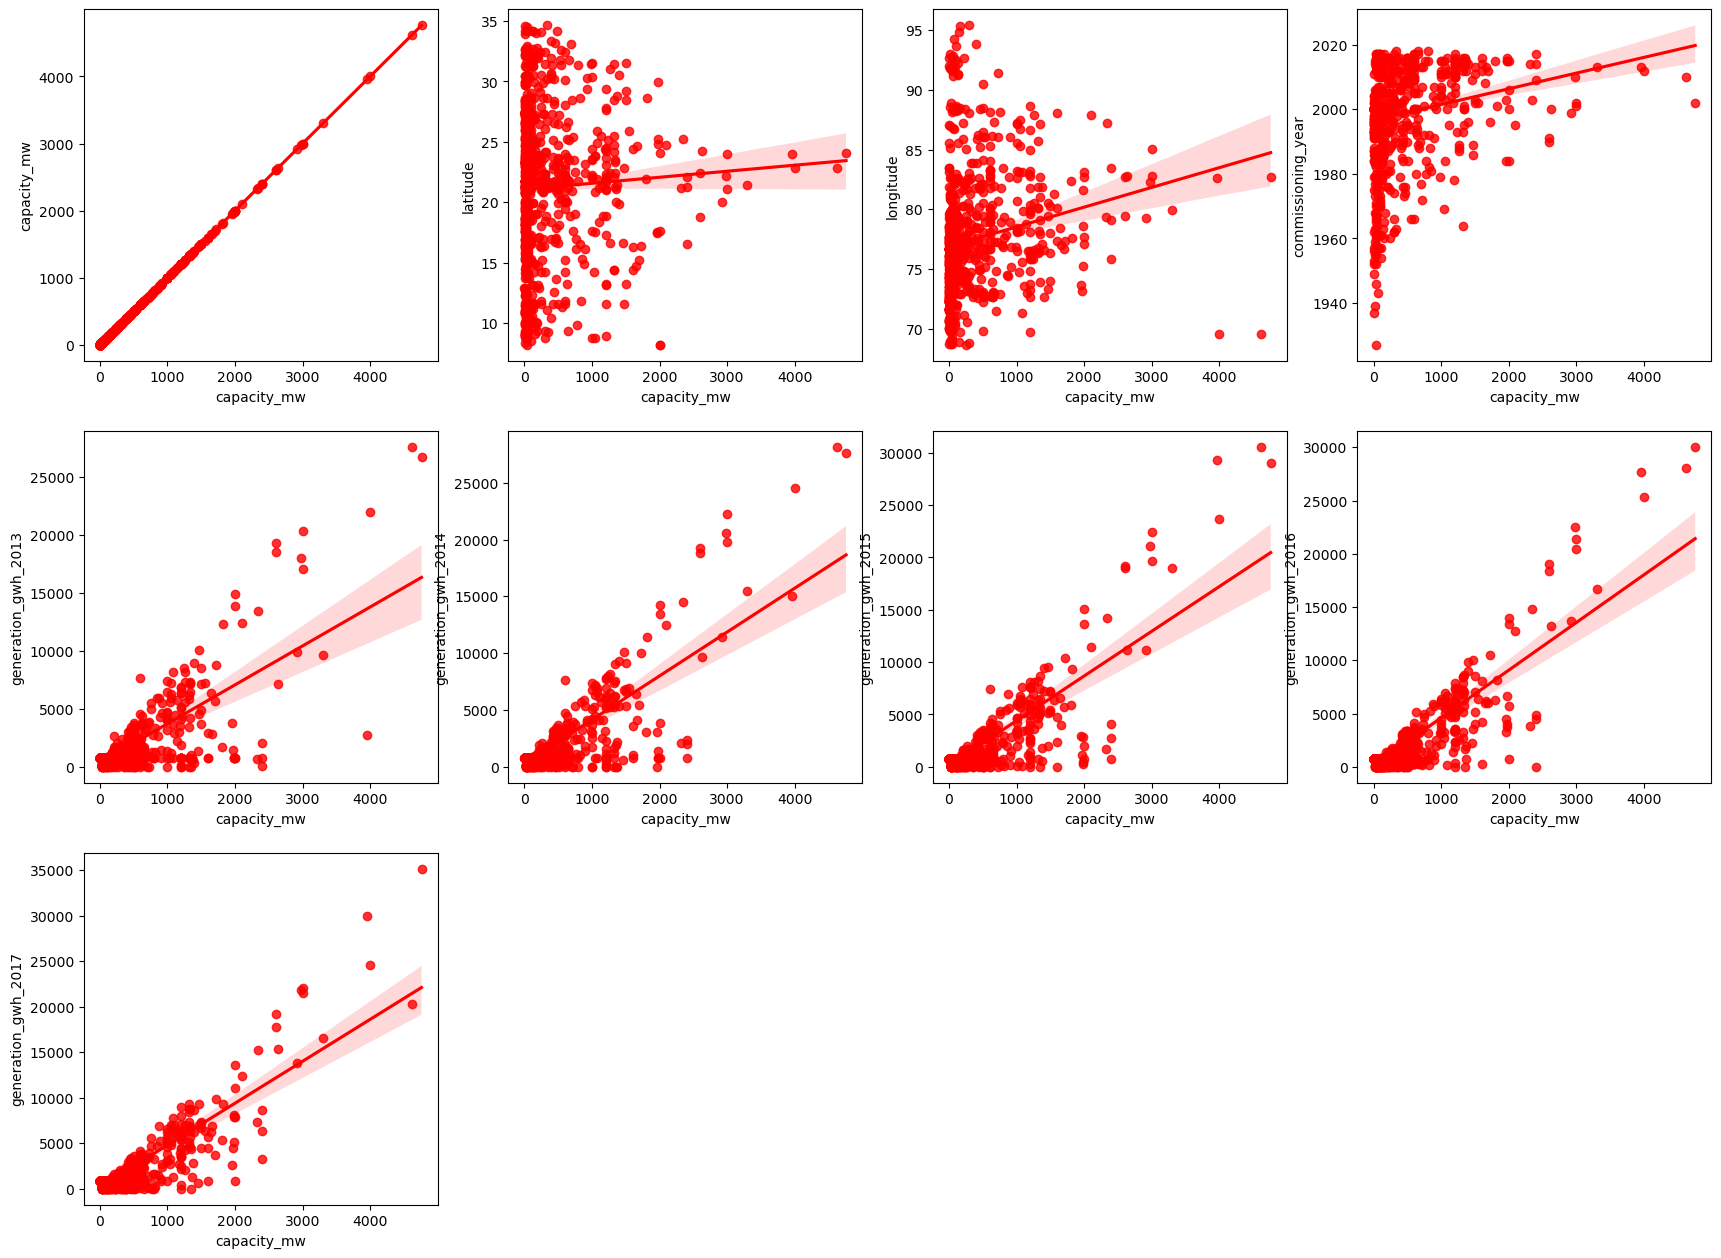

In [86]:
df1 = df.select_dtypes(include='number')
plt.figure(figsize=(21,21))
p=1
for i in df1:
    if p<=14:
        plt.subplot(4,4,p)
        sns.regplot(x='capacity_mw',y=i,data=df1,color='r')
        #sns.lmplot(data=df1,x='Happiness Score',y=i,palette='colorblind')
        plt.xlabel("capacity_mw")
        plt.ylabel(i)
    p+=1
plt.show()

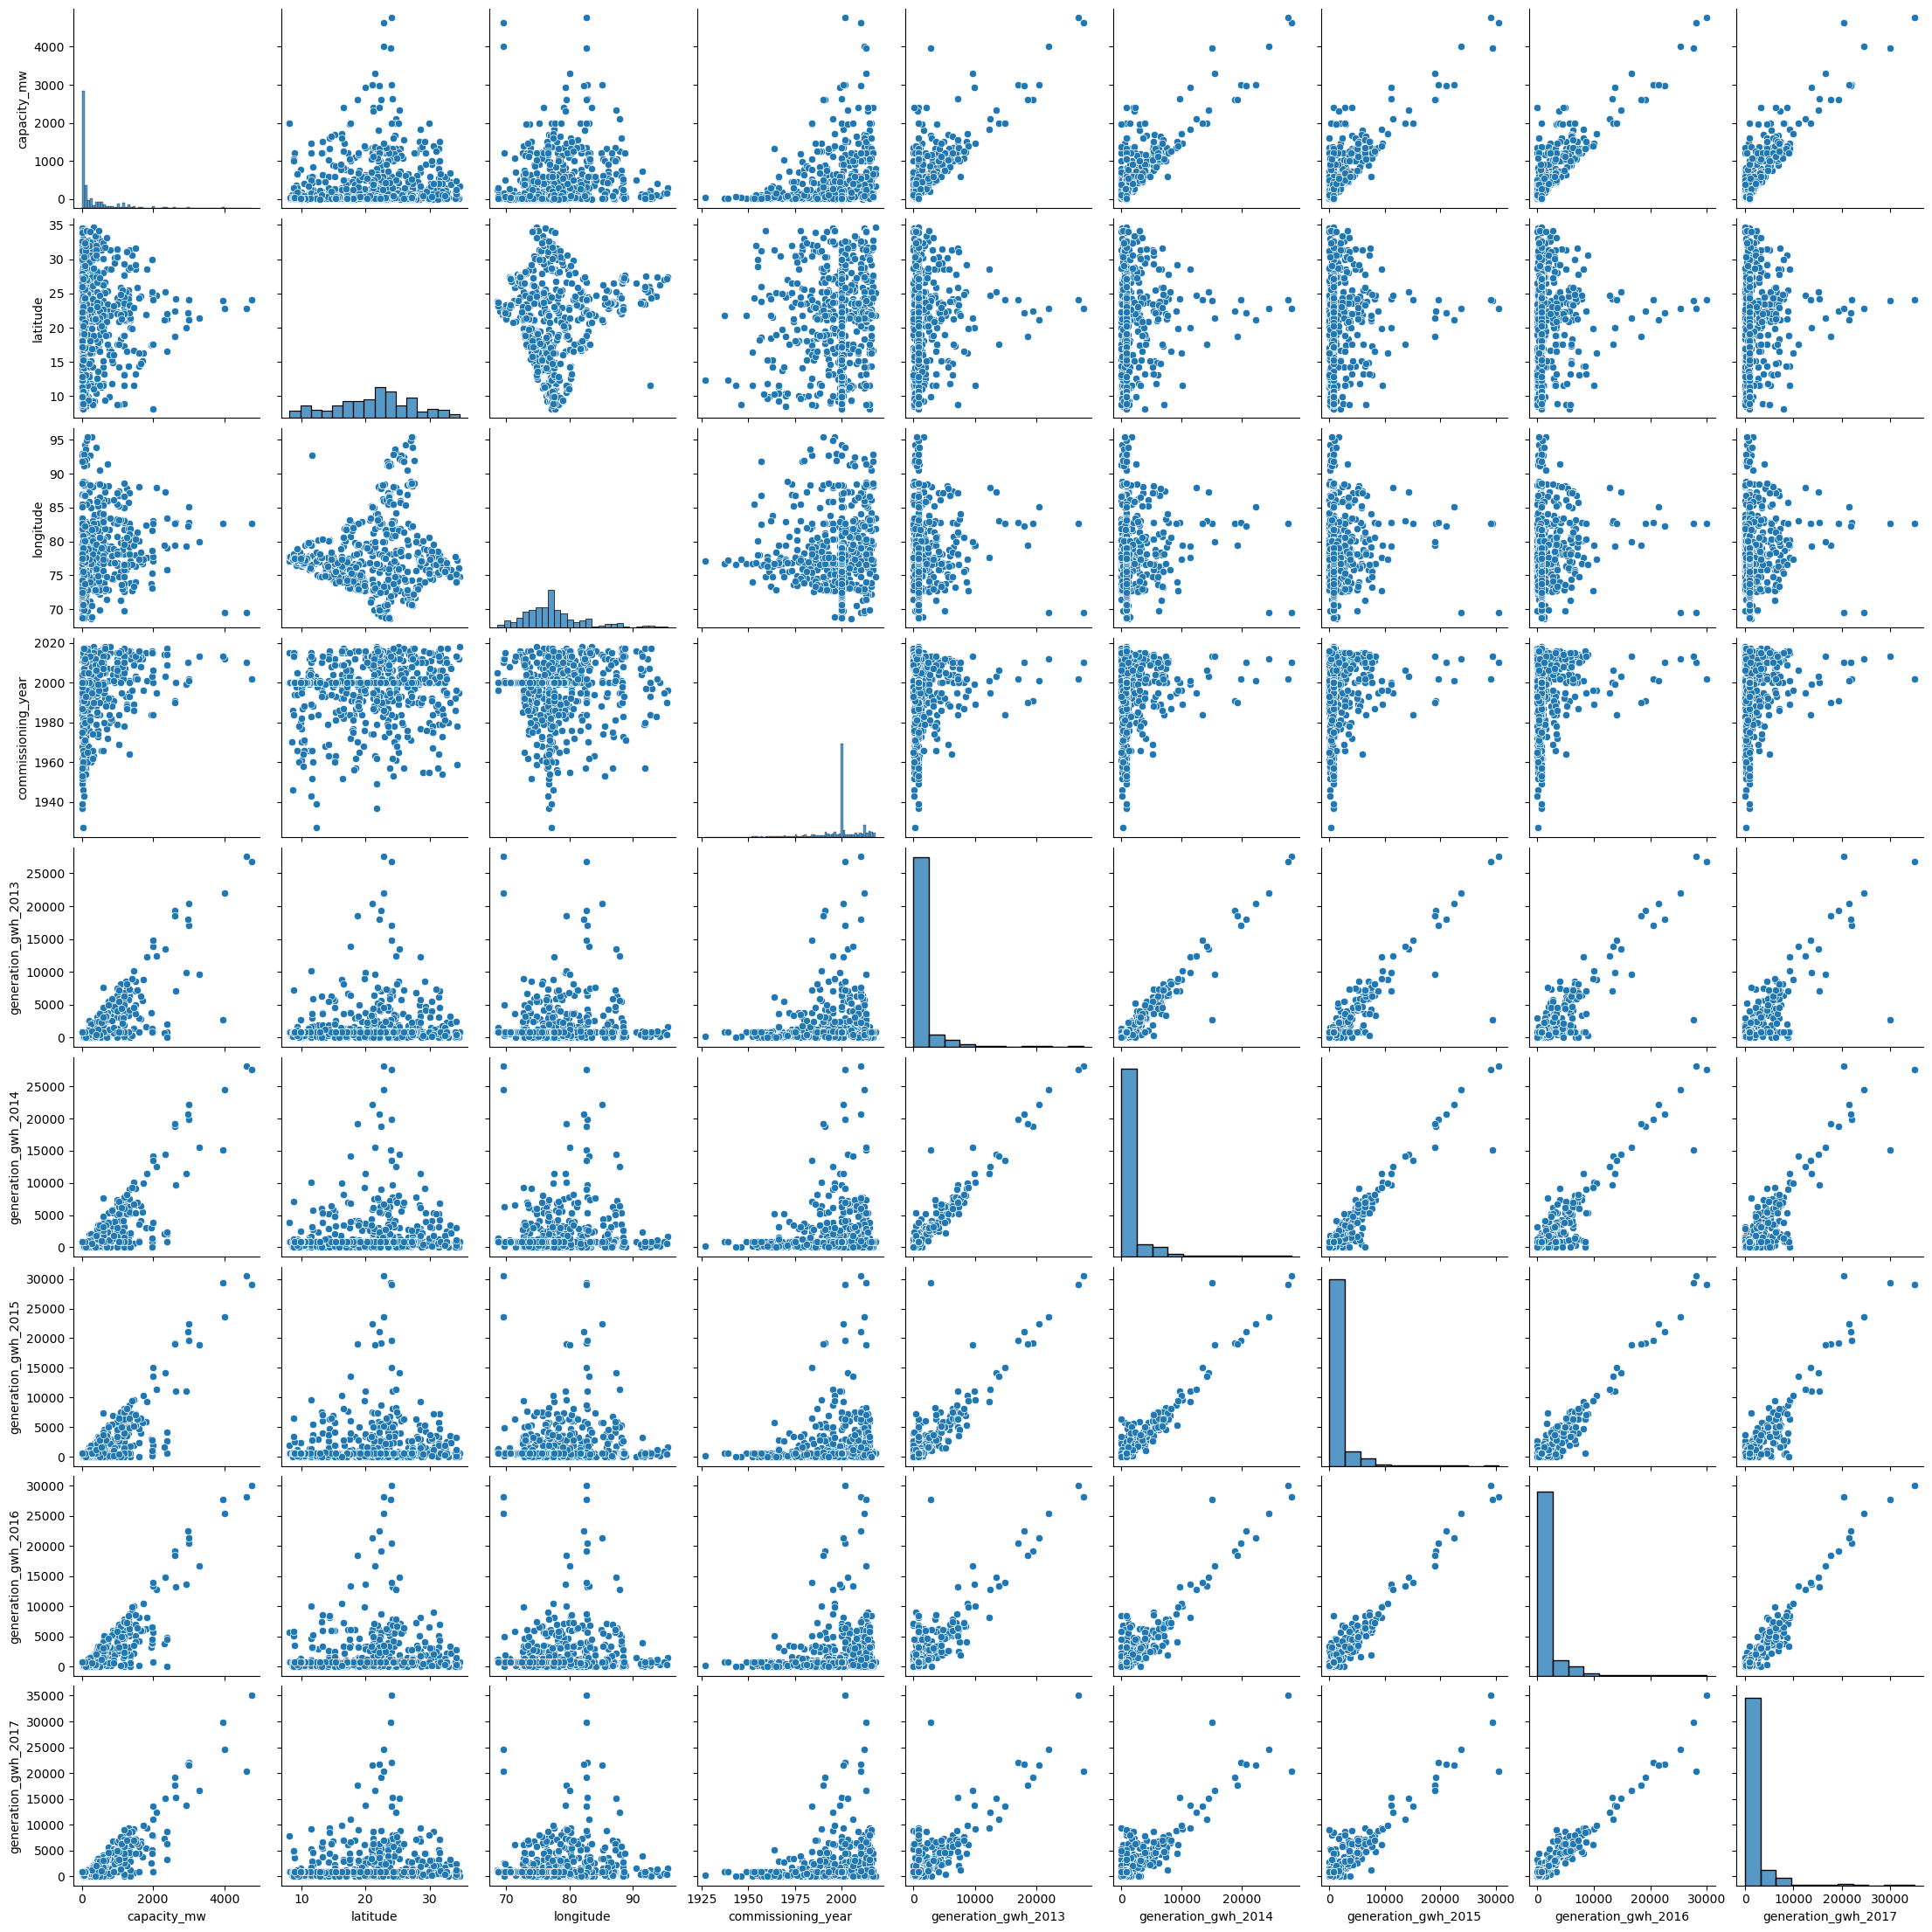

In [90]:
sns.pairplot(data=df,palette='dark2')

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

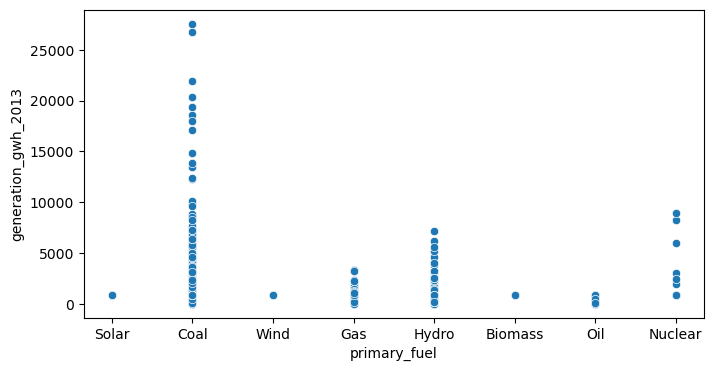

In [92]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

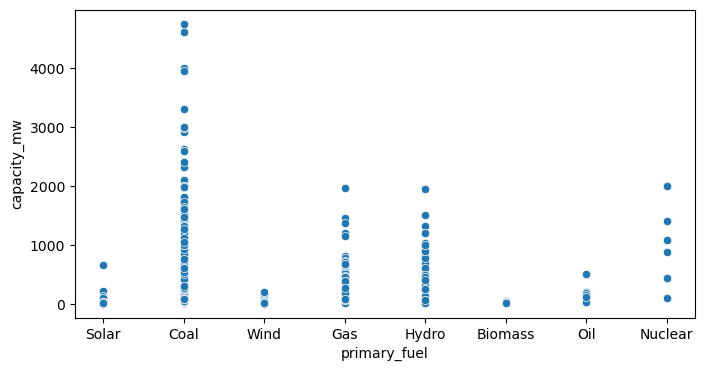

In [94]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df)

## coal has highest capacity in mw and gas hydro and nuclear ha average

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

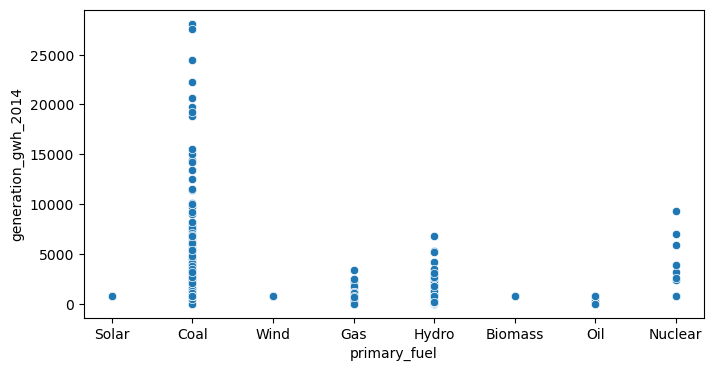

In [99]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

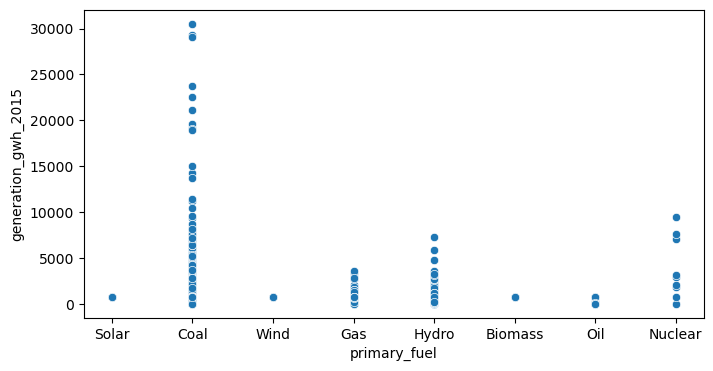

In [101]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

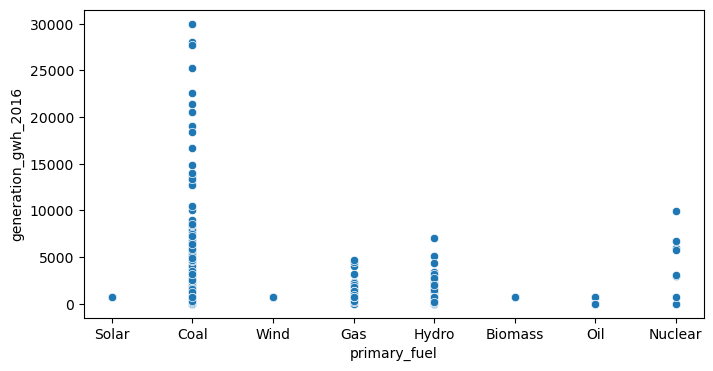

In [103]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

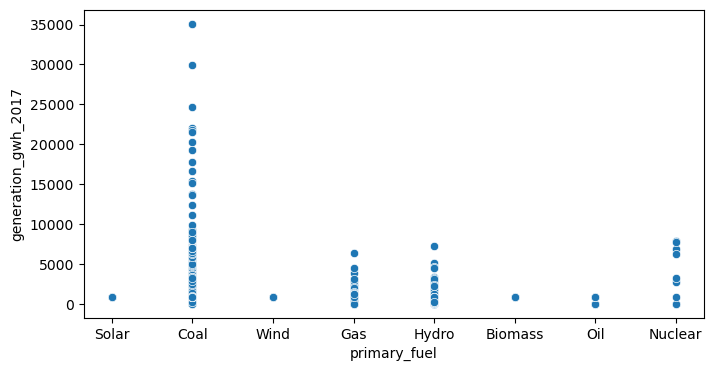

In [105]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

## over all years coal has hiest use and it has hiest capacity

In [123]:
# lets convert catogorical data in numeric using lableencoder

In [110]:
from sklearn.preprocessing import LabelEncoder

In [112]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [115]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [117]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   longitude            908 non-null    float64
 4   primary_fuel         908 non-null    int64  
 5   commissioning_year   908 non-null    float64
 6   owner                908 non-null    object 
 7   source               908 non-null    int64  
 8   geolocation_source   908 non-null    int64  
 9   generation_gwh_2013  908 non-null    float64
 10  generation_gwh_2014  908 non-null    float64
 11  generation_gwh_2015  908 non-null    float64
 12  generation_gwh_2016  908 non-null    float64
 13  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 99.4+ KB


In [145]:
#lets drop rgppd_idnr and owner colomn
df.drop('owner',axis=1,inplace =True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int64  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int64  
 6   geolocation_source   908 non-null    int64  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 85.3 KB


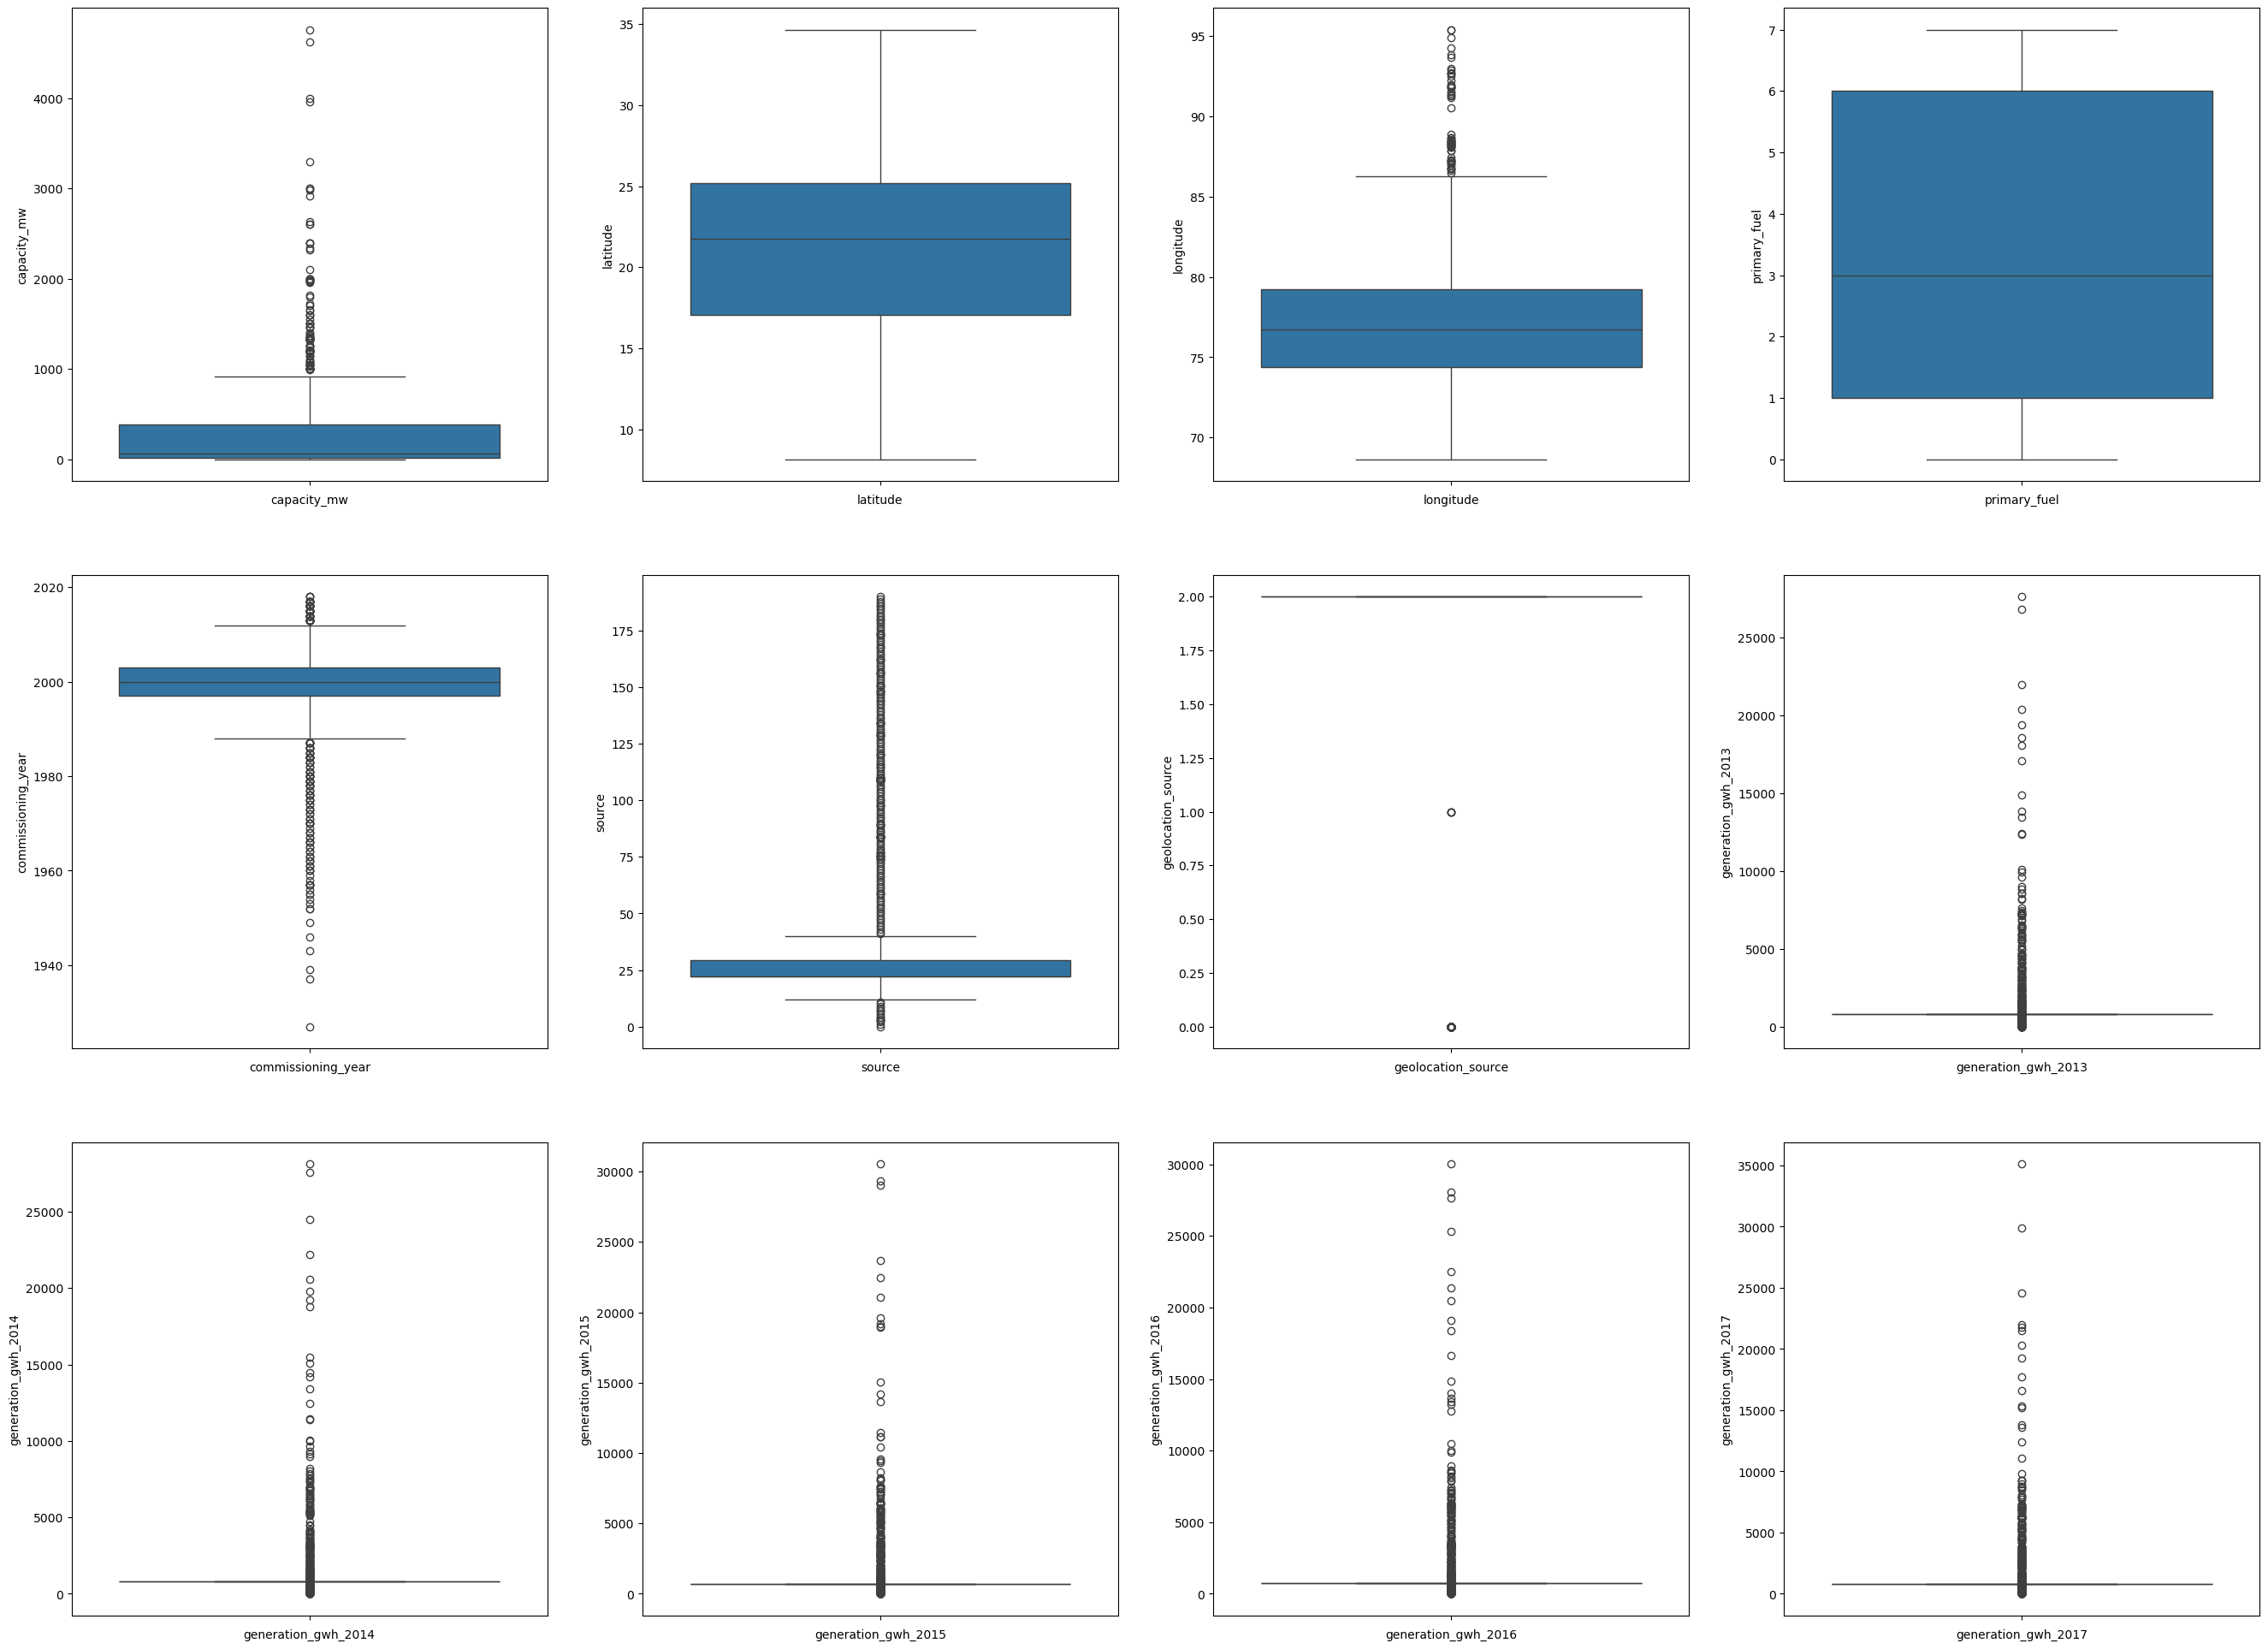

In [149]:
plt.figure(figsize=(33,33))
n=1
for i in df:
    if n<=13:
        plt.subplot(4,4,n)
        sns.boxplot(df[i])
        plt.xlabel(i)
    n+=1
plt.show()

In [151]:
#removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881]), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]))


In [153]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [155]:
df.skew()

capacity_mw            2.052718
latitude              -0.154305
longitude              1.213928
primary_fuel           0.430662
commissioning_year    -1.651594
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    3.160305
generation_gwh_2014    3.010821
generation_gwh_2015    2.800906
generation_gwh_2016    2.745584
generation_gwh_2017    2.637123
dtype: float64

In [157]:
from sklearn.preprocessing import power_transform

df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [159]:
df.skew()

capacity_mw            0.014952
latitude              -0.154305
longitude              1.213928
primary_fuel           0.430662
commissioning_year    -1.651594
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    0.278293
generation_gwh_2014    0.233312
generation_gwh_2015    0.170982
generation_gwh_2016    0.156971
generation_gwh_2017    0.132325
dtype: float64

In [165]:
#assigning feature and target data
x = df.drop('capacity_mw',axis=1)
y = df['capacity_mw']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (885, 11)
label Dimension (885,)


In [167]:
#standard scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.135279,-0.858703,1.199656,0.984835,1.434655,-1.062504,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
1,0.578469,-0.571395,-0.992118,0.147876,2.877991,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
2,0.112098,-1.670781,1.638011,0.147876,-0.519400,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
3,0.432636,2.945935,-0.553764,0.452225,-0.497195,0.399885,-0.239617,-0.250955,0.125596,0.144068,-0.165717
4,0.121304,1.066430,-0.992118,1.289184,-0.497195,0.399885,0.770252,1.455958,2.327262,2.323371,2.039600
...,...,...,...,...,...,...,...,...,...,...,...
880,-0.801728,0.005574,-0.992118,1.365271,-0.497195,0.399885,-0.023108,-0.019009,-2.473356,-0.815472,0.047283
881,-1.355947,0.175359,1.199656,0.147876,0.724089,-2.524892,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
882,-0.967764,-0.367278,1.638011,0.147876,-0.519400,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
883,0.510644,-0.752246,-0.992118,0.147876,0.324396,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [171]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('maximum r2 score',maxAccu,'on Random_state',maxRS)

maximum r2 score 0.5885131204766894 on Random_state 67


In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = maxRS)

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [185]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('R2_Score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score: 0.5813311719075993
R2_score on training data: 47.7896613780473
mean absolute error: 0.5599294823639236
Mean Squared Error: 0.4533121608202834
root mean squared error: 0.6732846061067217


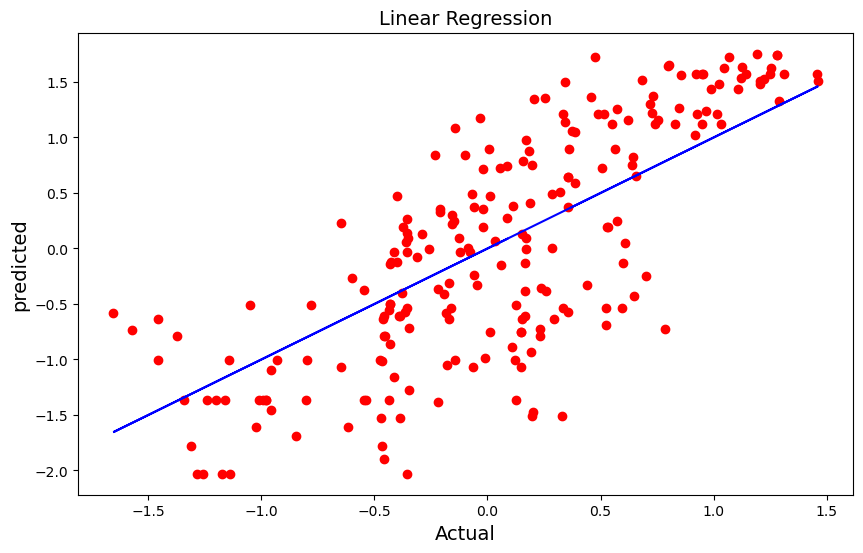

In [191]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.show()

In [193]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr )
print('R2_Score:',r2_score(y_test,pred_rfr ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
R2_Score: 0.8501562911516887
R2_score on training data: 96.06298879491534
mean absolute error: 0.280768430093124
Mean Squared Error: 0.16224273431783204
root mean squared error: 0.4027936622115994


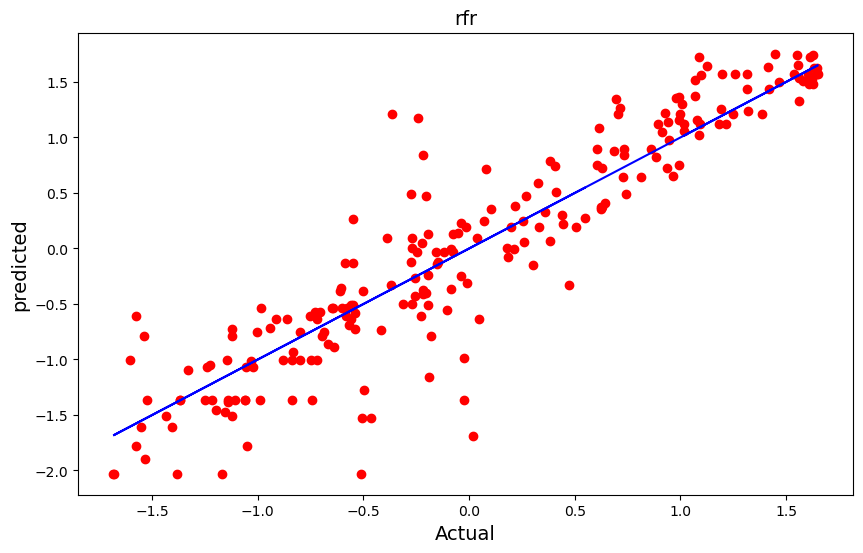

In [195]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_rfr,y=y_test,color='r')
plt.plot(pred_rfr,pred_rfr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('rfr',fontsize=14)
plt.show()

In [197]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR )
print('R2_Score:',r2_score(y_test,pred_GBR ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_Score: 0.8415456561749832
R2_score on training data: 87.66950398179
mean absolute error: 0.30336327873105
Mean Squared Error: 0.17156586822562694
root mean squared error: 0.4142051040554992


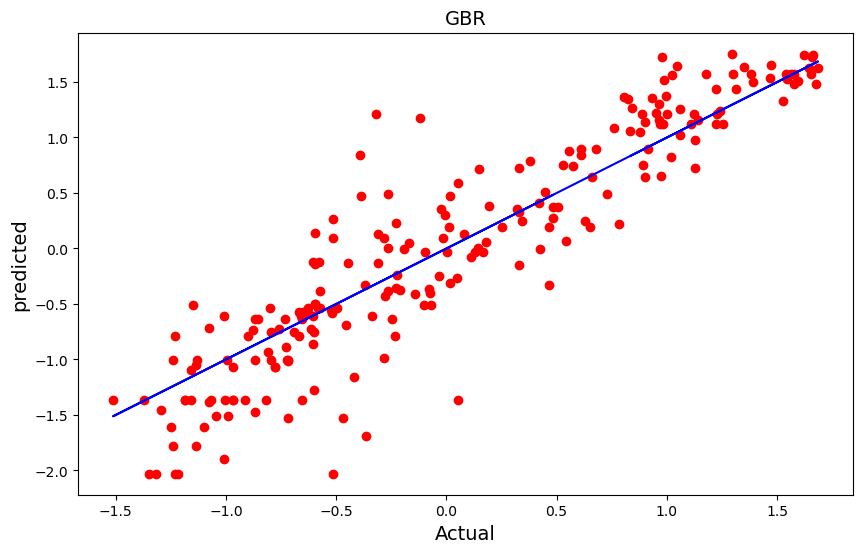

In [199]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR,y=y_test,color='r')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('GBR',fontsize=14)
plt.show()

In [201]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_Score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_Score: 0.7516392921477264
R2_score on training data: 77.1979239645927
mean absolute error: 0.38447156584750736
Mean Squared Error: 0.2689116590130319
root mean squared error: 0.5185669281905971


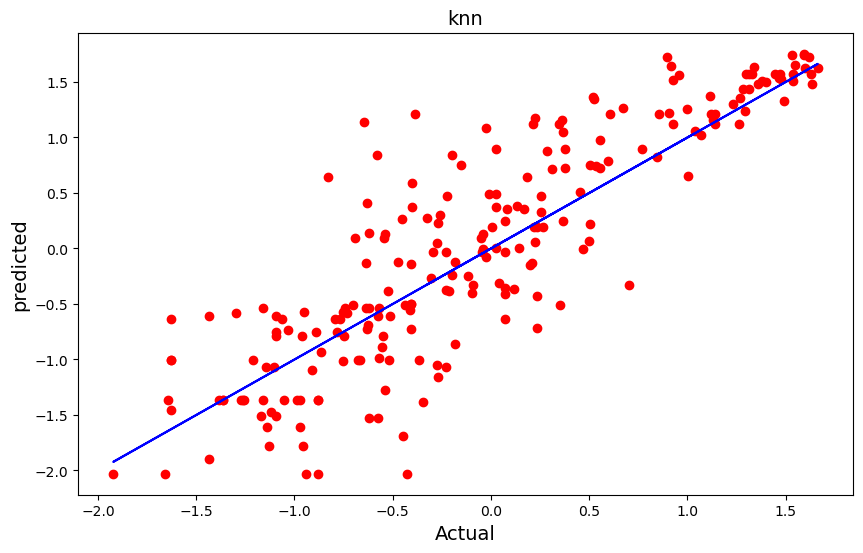

In [203]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn,y=y_test,color='r')
plt.plot(pred_knn,pred_knn,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('knn',fontsize=14)
plt.show()

In [205]:
## rfr and gbr both is good

In [207]:
from sklearn.model_selection import cross_val_score

In [209]:
score = cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_rfr) - score.mean())*100)

[0.75373633 0.77145046 0.75206269 0.84230012 0.77824792]
0.7795595048197485
difference between R2 score and cross validation score is: 7.059678633194022


In [211]:
score = cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR) - score.mean())*100)

[0.77410616 0.79678507 0.77246183 0.83458698 0.77390199]
0.7903684079203374
difference between R2 score and cross validation score is: 5.117724825464586


## GBR is best

In [214]:
from sklearn.model_selection import GridSearchCV

In [276]:
parameters = {'n_estimators':[10,20,30,40,50],'max_depth': [100, 250,200,300],'min_samples_split': [1,2,3,4,5,10],'min_samples_leaf': [3,4,5,6]}

In [278]:
gscv = GridSearchCV(GBR,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [100, 250, 200, 300],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [280]:
gscv.best_params_

{'max_depth': 200,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

In [282]:
model = GradientBoostingRegressor(max_depth = 200,min_samples_leaf =5,min_samples_split=5,n_estimators= 30)

In [284]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 0.827294886653079
mean absolute error: 0.3084452513813151
Mean Squared Error: 0.17156586822562694
root mean squared error: 0.4324301532414906


In [286]:
import pickle
filename = 'Power_Plan_capacity.pkl'
pickle.dump(model,open(filename,'wb'))

In [288]:
import pickle
load_model = pickle.load(open('Power_Plan_capacity.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

82.7294886653079


In [290]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
Predicted,0.554261,-0.244711,-0.325593,1.469087,1.037115,0.023688,1.370269,-1.272171,-0.329388,-1.129683,...,1.456138,-1.012500,1.158429,-0.252417,0.323772,-1.383446,-0.22584,1.009624,1.114683,0.976329
original,0.278582,-0.028360,-0.128777,1.506330,1.138585,0.713073,1.213992,-1.366281,-0.790474,-1.064545,...,1.530448,-1.008694,1.570284,0.846317,0.789905,-1.366281,-0.02836,1.254437,1.562388,1.062131


## now take Primary Fuel as target data

In [293]:
#assigning feature and target data
x1 = df.drop('primary_fuel',axis=1)
y1 = df['primary_fuel']
print("feature dimension=",x1.shape)
print('label Dimension',y1.shape)

feature dimension= (885, 11)
label Dimension (885,)


In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.689076,1.135279,-0.858703,0.984835,1.434655,-1.062504,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
1,0.240873,0.578469,-0.571395,0.147876,2.877991,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
2,-0.262967,0.112098,-1.670781,0.147876,-0.519400,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
3,0.415568,0.432636,2.945935,0.452225,-0.497195,0.399885,-0.239617,-0.250955,0.125596,0.144068,-0.165717
4,1.784019,0.121304,1.066430,1.289184,-0.497195,0.399885,0.770252,1.455958,2.327262,2.323371,2.039600
...,...,...,...,...,...,...,...,...,...,...,...
880,1.723664,-0.801728,0.005574,1.365271,-0.497195,0.399885,-0.023108,-0.019009,-2.473356,-0.815472,0.047283
881,-1.608681,-1.355947,0.175359,0.147876,0.724089,-2.524892,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
882,-0.499995,-0.967764,-0.367278,0.147876,-0.519400,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767
883,0.129719,0.510644,-0.752246,0.147876,0.324396,0.399885,-0.023108,-0.019009,-0.030370,-0.032006,-0.009767


In [297]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,111):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x1_train,y1_train)# training model
    pred = RFR.predict(x1_test)# predicting y test
    acc = accuracy_score(y1_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.9152542372881356 at random_state 41


In [299]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x1, y1):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=41)
    model.fit(x1_train,y1_train)# Training the model
    pred = model.predict(x1_test)# predicting y test
    acc = accuracy_score(y1_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y1_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x1, y1, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [301]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=64)
classify(model, x1, y1)

accuracy score 0.8135593220338984
classification_report               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.82      0.75      0.78        48
           2       0.17      0.20      0.18         5
           3       0.79      0.87      0.83        47
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       0.76      0.93      0.83        27

    accuracy                           0.81       177
   macro avg       0.56      0.56      0.56       177
weighted avg       0.80      0.81      0.80       177

Cross Validation Score: 0.7570621468926555

Accuracy Score - Cross Validation Score is 0.05649717514124286


In [303]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x1,y1)

accuracy score 0.9096045197740112
classification_report               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.93      0.85      0.89        48
           2       0.50      0.40      0.44         5
           3       0.84      1.00      0.91        47
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        27

    accuracy                           0.91       177
   macro avg       0.71      0.67      0.68       177
weighted avg       0.90      0.91      0.90       177

Cross Validation Score: 0.8418079096045197

Accuracy Score - Cross Validation Score is 0.06779661016949157


In [305]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x1,y1)

accuracy score 0.8870056497175142
classification_report               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.85      0.85      0.85        48
           2       0.40      0.40      0.40         5
           3       0.86      0.94      0.90        47
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        27

    accuracy                           0.89       177
   macro avg       0.64      0.63      0.64       177
weighted avg       0.88      0.89      0.88       177

Cross Validation Score: 0.8508474576271187

Accuracy Score - Cross Validation Score is 0.0361581920903955


In [307]:
model=BaggingClassifier()
classify(model,x1,y1)

accuracy score 0.8870056497175142
classification_report               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.89      0.88      0.88        48
           2       0.25      0.40      0.31         5
           3       0.86      0.94      0.90        47
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        27

    accuracy                           0.89       177
   macro avg       0.63      0.63      0.62       177
weighted avg       0.89      0.89      0.88       177

Cross Validation Score: 0.8384180790960452

Accuracy Score - Cross Validation Score is 0.04858757062146901


In [309]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x1,y1)

accuracy score 0.6440677966101694
classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.40      0.21      0.27        48
           2       0.00      0.00      0.00         5
           3       0.50      1.00      0.67        47
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       0.96      1.00      0.98        27

    accuracy                           0.64       177
   macro avg       0.36      0.40      0.37       177
weighted avg       0.56      0.64      0.57       177

Cross Validation Score: 0.5570621468926554

Accuracy Score - Cross Validation Score is 0.08700564971751401


In [313]:
model=RandomForestClassifier(max_depth=15, random_state=37)
classify(model,x1,y1)

accuracy score 0.903954802259887
classification_report               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.89      0.88      0.88        48
           2       0.25      0.20      0.22         5
           3       0.85      1.00      0.92        47
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        27

    accuracy                           0.90       177
   macro avg       0.69      0.64      0.66       177
weighted avg       0.89      0.90      0.90       177

Cross Validation Score: 0.8451977401129944

Accuracy Score - Cross Validation Score is 0.05875706214689258


GradientBoostingClassifier is best among other as it has least difference and accuracy is also good

In [374]:
from sklearn.model_selection import GridSearchCV

In [376]:
parameters = {'n_estimators':[1,2,3,4,5],'learning_rate':[0.7,0.6,0.5,0.4]}
gscv = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
gscv.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.7, 0.6, 0.5, 0.4],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [378]:
gscv.best_params_

{'learning_rate': 0.5, 'n_estimators': 4}

In [380]:
Final_Model = GradientBoostingClassifier(n_estimators=4,learning_rate=0.5)
Classifier = Final_Model.fit(x1_train, y1_train)
fmod_pred = Final_Model.predict(x1_test)
fmod_acc = (accuracy_score(y1_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 77.96610169491525


In [382]:
import pickle
filename = 'Power_Plant_Fuel.pkl'
pickle.dump(Final_Model,open(filename,'wb'))